# Projeto Interativo: Classificação de Vinhos com Scikit-Learn

In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Carregar e explorar o dataset

In [ ]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df['class'] = df['target'].apply(lambda x: wine.target_names[x])

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


## Distribuição das classes

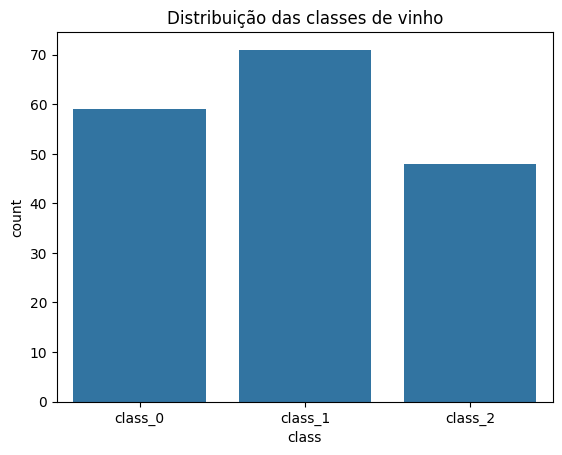

In [ ]:
sns.countplot(x='class', data=df)
plt.title('Distribuição das classes de vinho')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

## Visualização das features

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


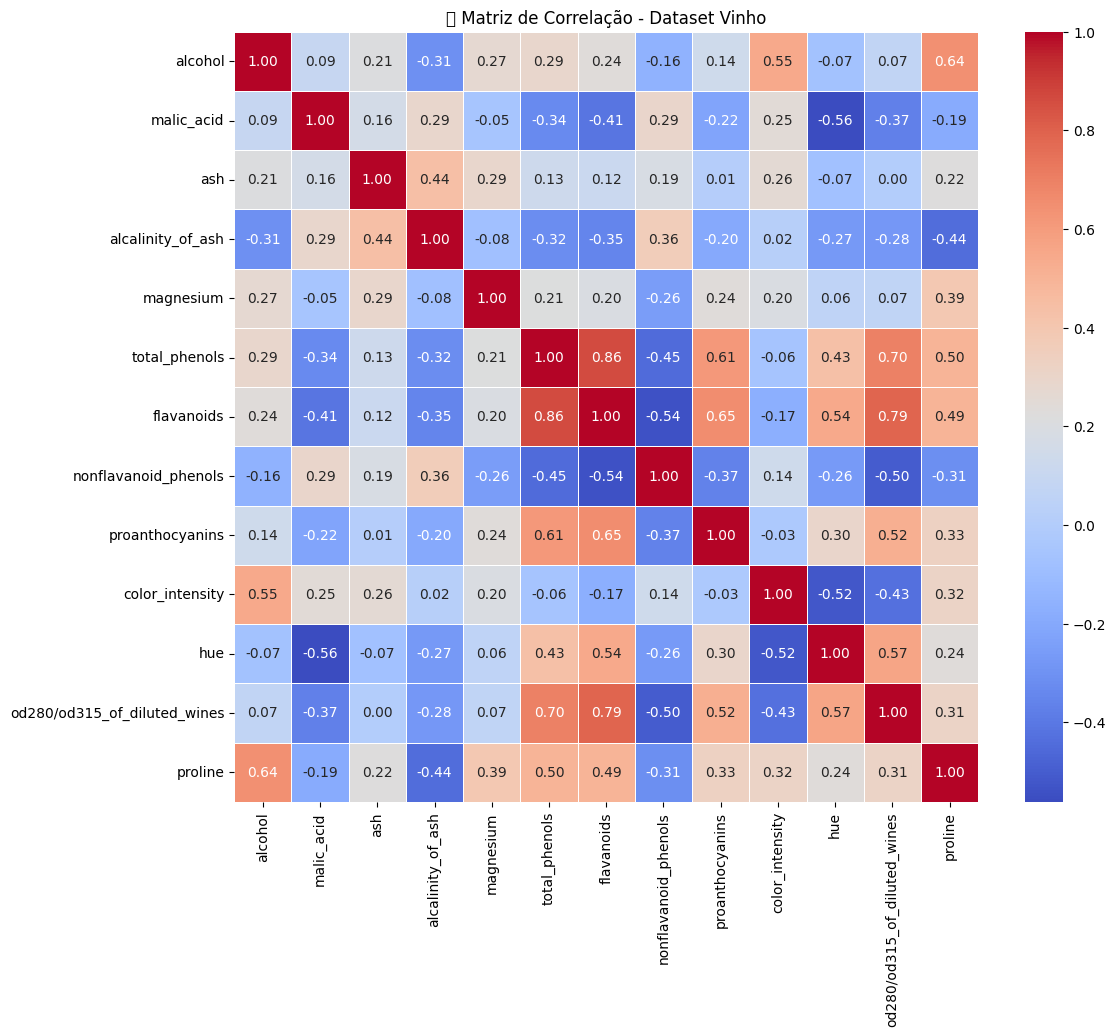

In [ ]:
# Carregar o dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Gerar matriz de correlação
corr_matrix = df.corr()

# Visualizar com heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('🔗 Matriz de Correlação - Dataset Vinho')
plt.show()

Interpretação rápida
• Correlação próxima de 1 → forte relação positiva
• Correlação próxima de -1 → forte relação negativa
• Correlação próxima de 0 → pouca ou nenhuma relação

Correlações Fortes Positivas (↑)
Essas variáveis têm alta associação e podem indicar redundância ou relevância conjunta:
- flavanoids e total_phenols → 0.86
→ Flavonoides são um tipo de fenol, então essa correlação é esperada. Ambas são ótimas para distinguir tipos de vinho.
- od280/od315_of_diluted_wines e flavanoids → 0.79
→ Alta absorção óptica está ligada à concentração de flavonoides, o que pode indicar qualidade.
- alcohol e od280/od315_of_diluted_wines → 0.72
→ Vinhos com maior teor alcoólico tendem a ter maior absorção óptica, sugerindo maior concentração de compostos.
- proline e alcohol → 0.71
→ Prolina, um aminoácido, pode estar associada à maturação ou qualidade do vinho.
----------------------------------------------------------------------------
Correlações Fortes Negativas (↓)
Essas variáveis se movem em direções opostas e podem ajudar a contrastar classes:
- flavanoids e nonflavanoid_phenols → −0.43
→ Relação inversa entre tipos de fenóis. Pode indicar equilíbrio químico entre compostos.
- color_intensity e hue → −0.56
→ Vinhos mais intensos em cor tendem a ter tonalidade mais baixa. Útil para distinguir visualmente os tipos.
----------------------------------------------------------------------------
- Variáveis com alta correlação positiva podem ser redundantes → úteis para redução de dimensionalidade com PCA.
- Variáveis com boa separação entre classes (como flavanoids, alcohol, od280/od315) são excelentes para modelos de classificação.
- Correlações negativas ajudam a contrastar padrões entre classes, especialmente em modelos baseados em árvores.



## Pré-processamento

In [ ]:
# Carregar o dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df['class'] = df['target'].apply(lambda x: wine.target_names[x])

X = df[wine.feature_names]
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Treinar e comparar modelos

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': acc})

Visualizar desempenho

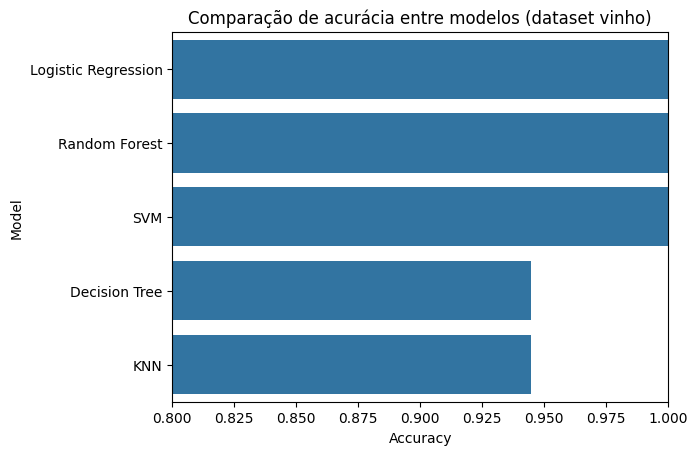

In [ ]:
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

sns.barplot(x='Accuracy', y='Model', data=results_df)
plt.title('Comparação de acurácia entre modelos (dataset vinho)')
plt.xlim(0.8, 1.0)
plt.show()

## Relatório de melhor modelo

In [ ]:
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

print(f'Melhor modelo: {best_model_name}')
print(classification_report(y_test, y_pred, target_names=wine.target_names))

Melhor modelo: Logistic Regression
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## Análise Final

In [ ]:
# Respostas às perguntas
print("➡️ Melhor modelo:", best_model_name)
print("➡️ Classes mais difíceis de prever: verifique precisão e recall no classification_report acima.")
print("➡️ O uso de StandardScaler influenciou os resultados: sim, especialmente para SVM, KNN e Logistic Regression.")

➡️ Melhor modelo: Logistic Regression
➡️ Classes mais difíceis de prever: verifique precisão e recall no classification_report acima.
➡️ O uso de StandardScaler influenciou os resultados: sim, especialmente para SVM, KNN e Logistic Regression.
